### Project 2

Question

Which taco option is most popular

what is the average mean number of choices per taco option

which choices is most popular for each taco option


In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns

path = str(Path('C://Users//GGPC//Documents//coding//GA//DATA'))
os.chdir(path)
os.getcwd()

df = pd.read_csv(path + '//chipotle.csv')

In [2]:
df = df = df.replace(np.nan, 0)

In [3]:
df.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [4]:
#creating a new dataframe called tacos from the chipotle - this stopped the error about makinga  copy of a slice froma df
tacos = pd.DataFrame(df)
tacos

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,0,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,0,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [5]:
# making a new df that only contains rows where thcos is found in the item name column
tacos = tacos[tacos['item_name']. str. contains('taco', case = False)]
tacos

,order_id,quantity,item_name,choice_description,item_price
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
35,18,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, Rice]",$8.75
36,18,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",$8.75
...,...,...,...,...,...
4549,1808,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Rice, Pinto Bea...",$9.25
4550,1809,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Chees...",$8.75
4554,1810,1,Steak Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$11.75
4557,1811,1,Carnitas Soft Tacos,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$9.25


In [6]:
# Creating a new column which contains the length of the list from the choice discriptions
tacos.loc[:, 'choice_description_length'] = tacos.loc[:,'choice_description'].str.split(',').apply(len)


C:\Users\GGPC\AppData\Local\Temp\ipykernel_20508\2722485600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tacos.loc[:, 'choice_description_length'] = tacos.loc[:,'choice_description'].str.split(',').apply(len)


In [7]:
#making another column which contains the item name however with the soft/crispy removed
tacos.loc[:, 'stripped_tacos'] = tacos['item_name']
tacos.loc[tacos['stripped_tacos'].str.contains('Soft '), 'stripped_tacos'] = tacos['stripped_tacos'].str.replace('Soft ', '')
tacos.loc[tacos['stripped_tacos'].str.contains('Crispy '), 'stripped_tacos'] = tacos['stripped_tacos'].str.replace('Crispy ', '')


C:\Users\GGPC\AppData\Local\Temp\ipykernel_20508\1791479840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tacos.loc[:, 'stripped_tacos'] = tacos['item_name']


In [8]:
#finding the counts for new taco column
counts = tacos.stripped_tacos.value_counts()
counts

stripped_tacos
Chicken Tacos     163
Steak Tacos        91
Carnitas Tacos     47
Barbacoa Tacos     36
Veggie Tacos        8
Name: count, dtype: int64

In [9]:
# finding the mean chioce discription length by groupoing by the stripped taco column
mean_toppings = tacos.groupby('stripped_tacos').choice_description_length.mean().round(2).sort_values(ascending=[False])
mean_toppings

stripped_tacos
Veggie Tacos      6.00
Barbacoa Tacos    4.86
Carnitas Tacos    4.38
Chicken Tacos     4.20
Steak Tacos       4.14
Name: choice_description_length, dtype: float64

In [10]:
#creating a new colum which returns a boolen true = 1 if the choice describtions contains the topping

tacos.loc[:,'cheese'] = tacos['choice_description'].str.contains('cheese', case = False).astype(int)
tacos.loc[:,'salsa'] = tacos['choice_description'].str.contains('salsa', case = False).astype(int)
tacos.loc[:,'beans'] = tacos['choice_description'].str.contains('beans', case = False).astype(int)
tacos.loc[:,'rice'] = tacos['choice_description'].str.contains('rice', case = False).astype(int)
tacos.loc[:,'guac'] = tacos['choice_description'].str.contains('guacamole', case = False).astype(int)

C:\Users\GGPC\AppData\Local\Temp\ipykernel_20508\2153948262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tacos.loc[:,'cheese'] = tacos['choice_description'].str.contains('cheese', case = False).astype(int)
C:\Users\GGPC\AppData\Local\Temp\ipykernel_20508\2153948262.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tacos.loc[:,'salsa'] = tacos['choice_description'].str.contains('salsa', case = False).astype(int)
C:\Users\GGPC\AppData\Local\Temp\ipykernel_20508\2153948262.py:5: SettingWithCopyWarning

In [11]:
#creating a new dataframe which is grouped by the name with the colums of count(value count) and mean choice description length
taco_toppings = tacos.groupby('stripped_tacos').agg({'item_name': 'count', 'choice_description_length': 'mean'})
taco_toppings = taco_toppings.rename(columns={'item_name': 'Count', 'choice_description_length': 'Choices'})

In [12]:
#adding the sum of the toppings as new columns grouped to the taco name
taco_toppings.loc[:, 'salsa'] = tacos.groupby('stripped_tacos')['salsa'].sum()
taco_toppings.loc[:, 'cheese'] = tacos.groupby('stripped_tacos')['cheese'].sum()
taco_toppings.loc[:, 'rice'] = tacos.groupby('stripped_tacos')['rice'].sum()
taco_toppings.loc[:, 'beans'] = tacos.groupby('stripped_tacos')['beans'].sum()
taco_toppings.loc[:, 'guac'] = tacos.groupby('stripped_tacos')['guac'].sum()

taco_toppings.loc[:, 'Names'] = tacos.groupby('stripped_tacos')['stripped_tacos'].unique()
taco_toppings

,Count,Choices,salsa,cheese,rice,beans,guac,Names
stripped_tacos,,,,,,,,
Barbacoa Tacos,36,4.861111,36,31,21,20,12,[Barbacoa Tacos]
Carnitas Tacos,47,4.382979,47,40,26,15,5,[Carnitas Tacos]
Chicken Tacos,163,4.196319,162,138,79,44,41,[Chicken Tacos]
Steak Tacos,91,4.142857,89,76,28,19,20,[Steak Tacos]
Veggie Tacos,8,6.000000,8,8,5,8,2,[Veggie Tacos]


<Axes: title={'center': 'Counts of each taco option'}, xlabel='stripped_tacos', ylabel='Frequency'>

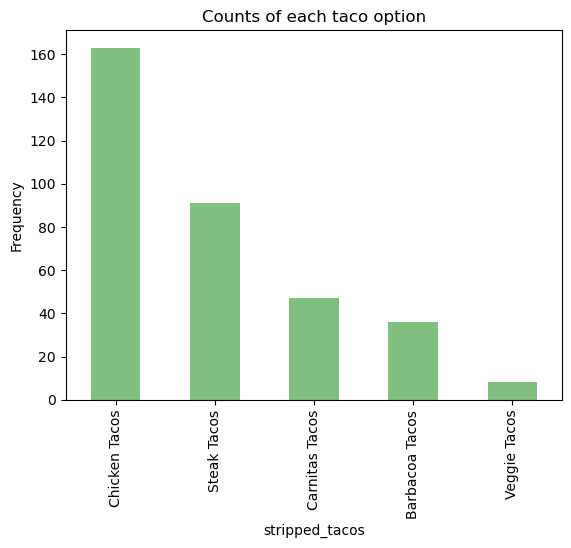

In [13]:
taco_toppings.Count.sort_values(ascending=[False]).plot(kind = 'bar',title = "Counts of each taco option", ylabel = 'Frequency', color = 'green', alpha = 0.5)

<Axes: title={'center': 'Mean number of choices per taco option'}, xlabel='stripped_tacos', ylabel='Frequency'>

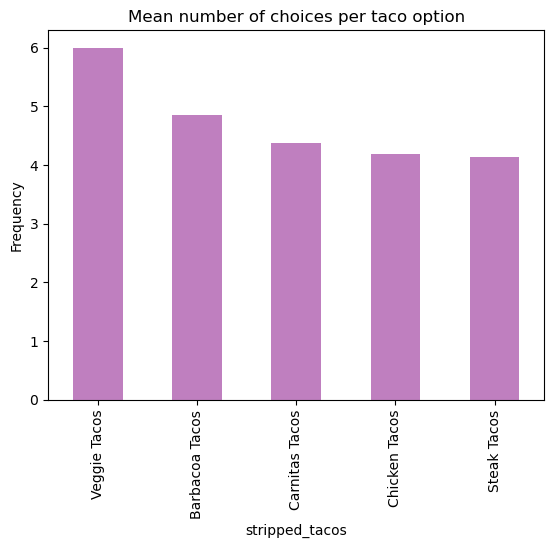

In [14]:
taco_toppings.Choices.sort_values(ascending=[False]).plot(kind = 'bar', title = "Mean number of choices per taco option", ylabel = 'Frequency', color = 'purple', alpha = 0.5)

<Axes: title={'center': 'Mean number of choices'}, ylabel='Density'>

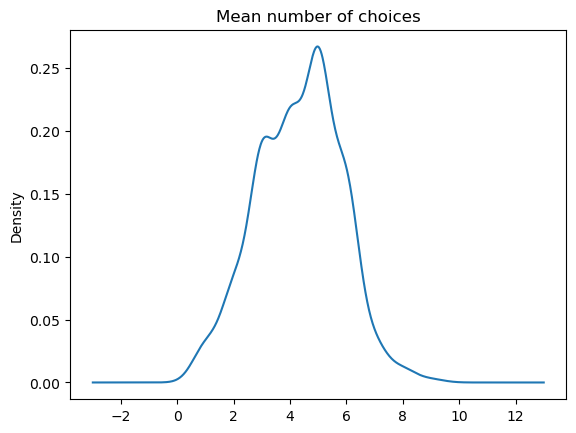

In [15]:
tacos.choice_description_length.plot(kind = 'density', title = "Mean number of choices")

<Axes: xlabel='Count', ylabel='Choices'>

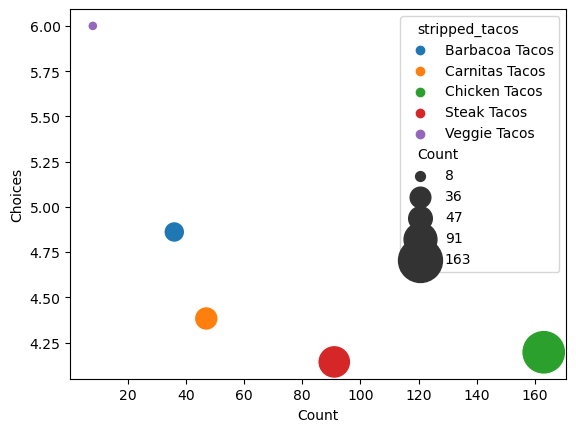

In [16]:
X = 'Choices'
y = 'Count'
sns.scatterplot(data=taco_toppings, x=y, y= X, hue = 'stripped_tacos', size = 'Count', sizes = (50,1000), legend = 'auto')

NameError: name 'plt' is not defined

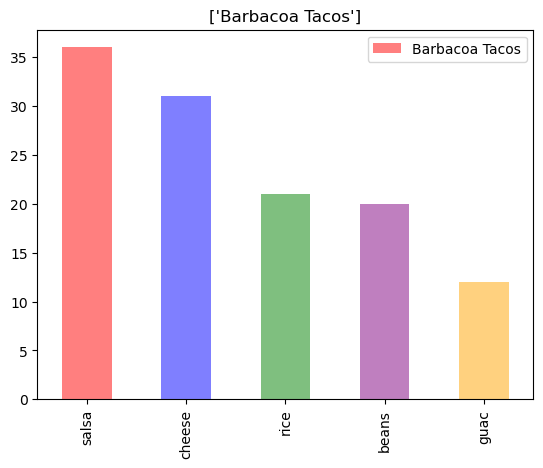

In [17]:
#creating a loop which will go though the rows of the Names column and make a plot for each with the info from the same row in the wanted columns
#also adds a title.
colors = ['red', 'blue', 'green', 'purple', 'orange']

for index, row in taco_toppings.iterrows():
    name = row['Names']
    toppings = row[['salsa', 'cheese', 'rice', 'beans', 'guac']]
    
    toppings.plot(kind = 'bar', title = '{}'.format(name), legend=True, color=colors, alpha=0.5)
    plt.xlabel('Name')
    plt.ylabel('toppings')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
tacodrop = tacos.iloc[:,5:]

In [ ]:
cor_matrix = tacos[['choice_description_length', 'salsa', 'cheese', 'rice', 'beans', 'guac']].corr()
sns.heatmap(cor_matrix, annot = True)

In [ ]:
g = sns.displot(tacos, x= 'choice_description_length', hue = 'stripped_tacos', col = 'stripped_tacos', kde= True)

In [ ]:
taco_toppings2 = taco_toppings.drop(columns=['Names'])

for column in taco_toppings2:
    plt.figure(figsize=(10,8))
    sns.displot(taco_toppings2, x= 'stripped_tacos', y = column, hue = 'stripped_tacos', aspect = 1.5, legend = False)